In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import AntoineEquation 
from IPython.display import clear_output
from tqdm import tqdm


In [2]:
import ipywidgets as widgets
from IPython.display import display
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquation(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquation(Tol_A, Tol_B, Tol_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(2, P_sys, [benzene_antoine, toluene_antoine])
# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0, max=1, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')

def plot_distil_binary(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    axs = distillation_model.plot_distil_binary(axs = axs)
    plt.subplots_adjust(hspace=0)

# Create the interactive widget:
interactive_plot = widgets.interactive(plot_distil_binary, xD = xD1_slider, xB = xB1_slider, R = R1_slider)

# Display the interactive widget:
display(interactive_plot)

interactive(children=(FloatSlider(value=0.95, description='$x_D$:', max=1.0, step=0.0001), FloatSlider(value=0…

x1: 0.95 y1: 0.9500000000000001
N: 1 x2 : 0.8808768312901352
y1: 1.1252523699048809
too big
x1: 0.95 y1: 0.9500000000000001
N: 1 x2 : 0.8808768312901353
y1: 0.9012071750283308
N: 2 x2 : 0.7815182612092471
y1: 0.8310717137947626
N: 3 x2 : 0.660734099630677
y1: 0.7458123056216543
N: 4 x2 : 0.5398374026237758
y1: 0.6604734606756064
N: 5 x2 : 0.439627738472393
y1: 0.5897372271569834
N: 6 x2 : 0.3684576494180114
y1: 0.5394995172362433
N: 7 x2 : 0.32317053357334913
y1: 0.5075321413458935
N: 8 x2 : 0.29630953586171255
y1: 0.488571437078856
N: 9 x2 : 0.28103166222823966
y1: 0.47778705569052216
N: 10 x2 : 0.2725475204956284
y1: 0.4717982497616201
N: 11 x2 : 0.2678984520584503
y1: 0.46851655439420026
N: 12 x2 : 0.2653694545778328
y1: 0.4667313797019996
N: 13 x2 : 0.2639991975320344
y1: 0.4657641394343772
N: 14 x2 : 0.26325836749695614
y1: 0.4652412005860867
N: 15 x2 : 0.26285830453171094
y1: 0.4649588031988548
N: 16 x2 : 0.2626423986781651
y1: 0.4648063990669401
N: 17 x2 : 0.26252591830238303
y1

[<Axes: title={'center': 'Equilibrium and Stripping Line'}>,
 <Axes: title={'center': 'Equilibrium and Rectifying Line'}>,
 <Axes: title={'center': 'Equilibrium and Operating Lines'}>]

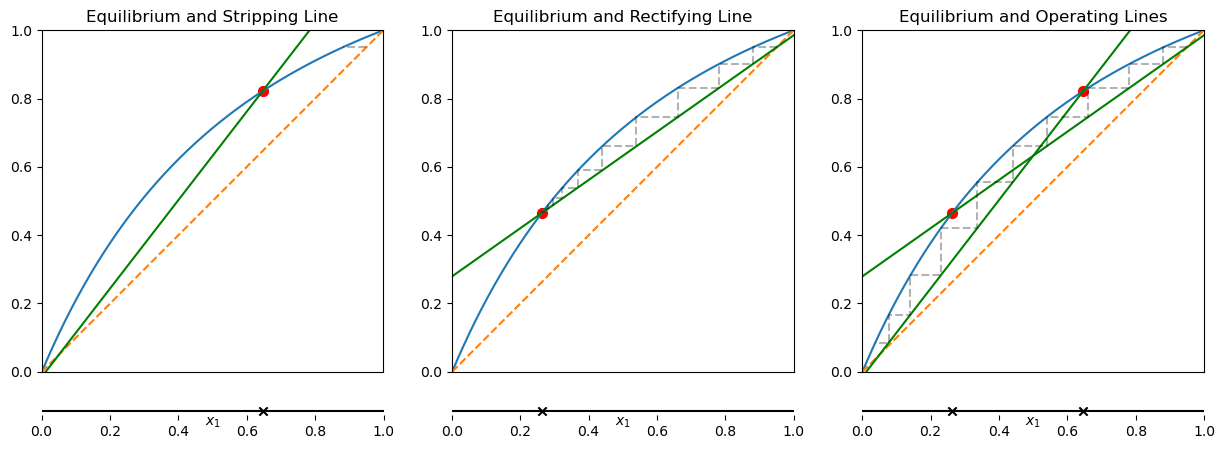

In [3]:
xD = 0.95
xB = 0.05
R = 2.4

distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
distillation_model.plot_distil_binary(axs=axs)

In [4]:
# Define the sliders:
xD2_slider = widgets.FloatSlider(value=0.95, min=0, max=1, step=0.0001, description='$x_D$:', readout_format='.2f')
xB2_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.0001, description='$x_B$:', readout_format='.2f')
r_max_slider = widgets.FloatSlider(value=1.0, min=0, max=100, step=1, description='R max:', readout_format='.1f')


def plot_r_vs_fixedpoints(r_max = r_max_slider.value, xD=xD2_slider.value, xB=xB2_slider.value):
    clear_output(wait=True)
    display("Calculating... Please wait.")
    r_values = np.linspace(0.001, r_max, 100)
    x_fixed_r_arr = []
    x_fixed_s_arr = []

    for r in tqdm(r_values, desc="Progress"):
        distillation_model = DistillationModel(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=r)
        x_fixed_r, _ = distillation_model.find_rect_fixedpoints_binary(100)
        x_fixed_s, _ = distillation_model.find_strip_fixedpoints_binary(100)
        x_fixed_r_arr.append(x_fixed_r)
        x_fixed_s_arr.append(x_fixed_s)

    # flatten the lists and repeat the r_values according to the number of x values
    r_values_r = np.repeat(r_values, [len(x) for x in x_fixed_r_arr])
    r_values_s = np.repeat(r_values, [len(x) for x in x_fixed_s_arr])
    x_fixed_r_arr = np.hstack(x_fixed_r_arr)
    x_fixed_s_arr = np.hstack(x_fixed_s_arr)

    plt.scatter(r_values_r, x_fixed_r_arr,marker = 'x')
    plt.scatter(r_values_s, x_fixed_s_arr, marker ='x')
    plt.xlabel("Reflux Ratio")
    plt.ylabel("x")
    plt.show()


# Create the interactive widget:
interactive_plot = widgets.interactive(plot_r_vs_fixedpoints, xD=xD2_slider, xB=xB2_slider, r_max = r_max_slider) 

# Display the interactive widget:
display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, description='R max:', readout_format='.1f', step=1.0), FloatSlide…